In [151]:
#%load_ext autoreload
#%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pprint
from tqdm import tqdm
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['font.size'] = 20

from main import experiment
from u_net import UNet, TrainLoss
import pprint
iterations = 1001

In [77]:
import pickle

def save(obj, filename):
    with open(filename, 'wb') as f:
        pickle.dump(obj, f)
        
def load(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

def plot(results, title='', legend=True, xticks=None, y1lim=None):
    results = dict(results)
    fig, ax1 = plt.subplots()
    for loss in 'cce_loss dice_fg_loss dice_loss'.split():
        y = results[loss]
        ax1.plot(range(len(y)), y, label=loss)
    ax1.set_xlabel('iteration')
    ax1.set_ylabel('loss')
    ax1.legend()
    if y1lim:
        ax1.set_ylim(y1lim[0], y1lim[1])
    
    ax2 = ax1.twinx()
    x = [x for x,v in results['accuracy']]
    acc = [v for x,v in results['accuracy']]
    ax2.plot(x, acc, 'k', label='accuracy')
    ax2.set_ylabel('accuracy')
    ax2.legend()

    #if legend:
    #    plt.legend()
    if xticks:
        plt.xticks(xticks)
    plt.title(title)
    
def plot_grad(results, title='', smooth=0):
    for grad in 'cce_grad dice_fg_grad dice_grad'.split():
        y = results[grad]
        if smooth:
            y = np.convolve(y, np.ones((smooth,))/smooth, mode='same')
        plt.plot(range(len(y)), y, label=grad)
    plt.legend()
    plt.xlabel('iteration')
    plt.ylabel('gradient norm')
    plt.title(title)

### Categorical Cross Entropy 50% FG

In [8]:
cce50_filename = './cce_50fg.pkl'

In [139]:
result = experiment(0.5, 201, TrainLoss.CCE, summary_dir='./test_cce')
save(result, cce50_filename)

INFO:tensorflow:Summary name model/left0/conv0/conv2d/kernel:0 is illegal; using model/left0/conv0/conv2d/kernel_0 instead.
INFO:tensorflow:Summary name model/left0/conv0/conv2d/bias:0 is illegal; using model/left0/conv0/conv2d/bias_0 instead.
INFO:tensorflow:Summary name model/left0/conv1/conv2d/kernel:0 is illegal; using model/left0/conv1/conv2d/kernel_0 instead.
INFO:tensorflow:Summary name model/left0/conv1/conv2d/bias:0 is illegal; using model/left0/conv1/conv2d/bias_0 instead.
INFO:tensorflow:Summary name model/left1/conv0/conv2d/kernel:0 is illegal; using model/left1/conv0/conv2d/kernel_0 instead.
INFO:tensorflow:Summary name model/left1/conv0/conv2d/bias:0 is illegal; using model/left1/conv0/conv2d/bias_0 instead.
INFO:tensorflow:Summary name model/left1/conv1/conv2d/kernel:0 is illegal; using model/left1/conv1/conv2d/kernel_0 instead.
INFO:tensorflow:Summary name model/left1/conv1/conv2d/bias:0 is illegal; using model/left1/conv1/conv2d/bias_0 instead.
INFO:tensorflow:Summary 

100%|██████████| 201/201 [05:13<00:00,  1.56s/it]


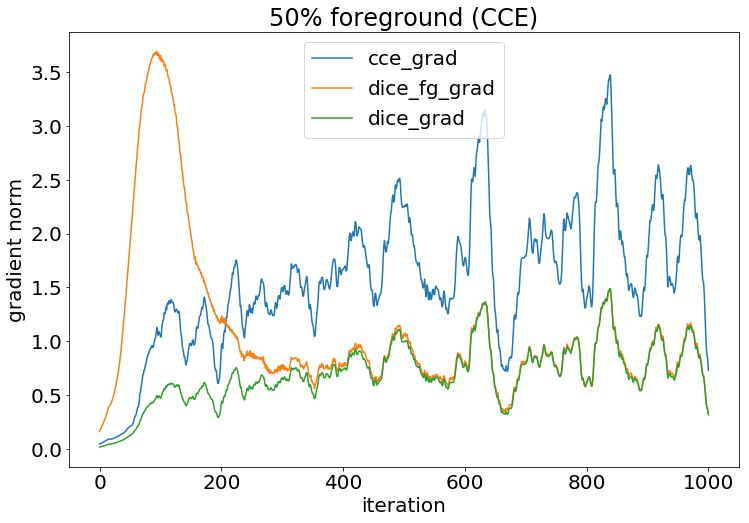

In [42]:
plot_grad(load(cce50_filename), title='50% foreground (CCE)', smooth=30)

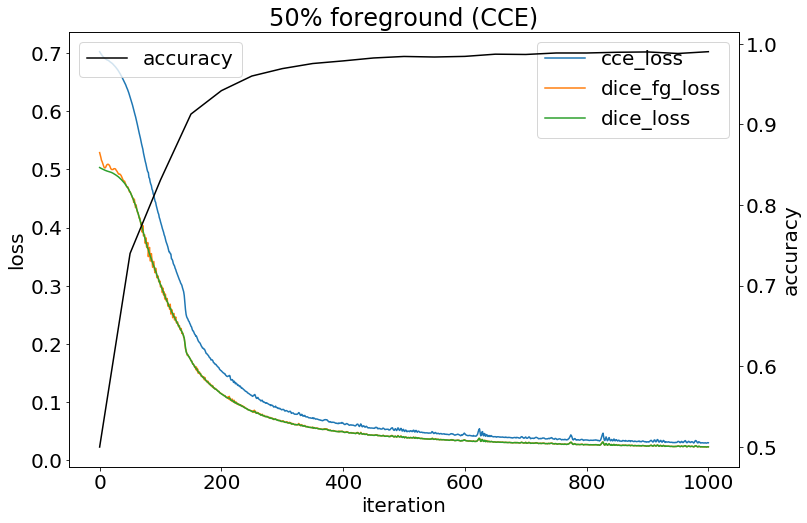

In [43]:
plot(load(cce50_filename), title='50% foreground (CCE)')

### Categorical Cross Entropy 20% FG

In [10]:
cce20_filename = './cce_20fg.pkl'

In [11]:
result = experiment(0.8, iterations, TrainLoss.CCE)
save(result, cce20_filename)

100%|██████████| 1001/1001 [21:20<00:00,  1.28s/it]


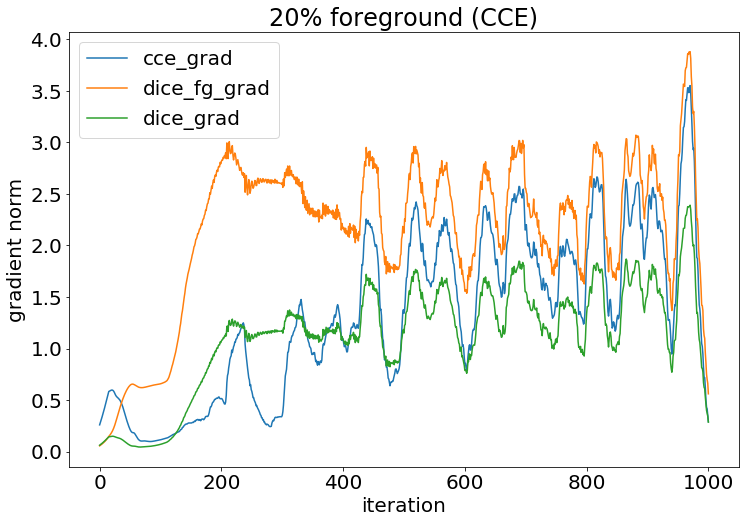

In [44]:
plot_grad(load(cce20_filename), title='20% foreground (CCE)', smooth=30)

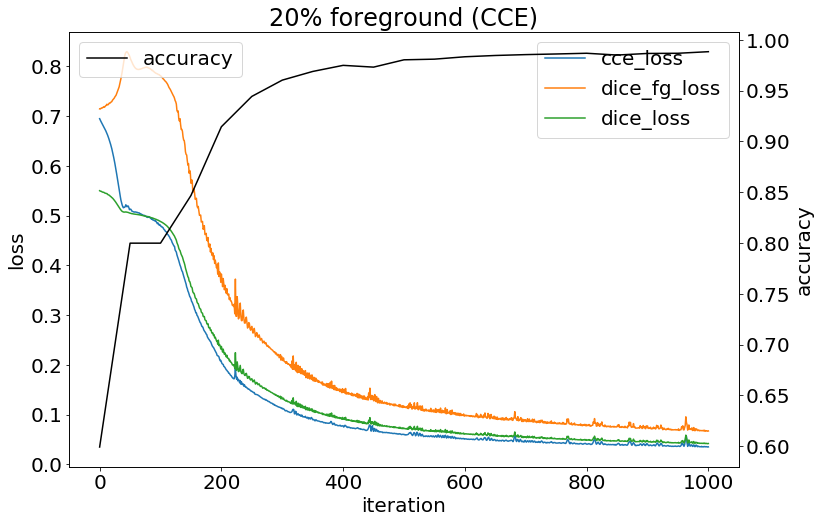

In [45]:
plot(load(cce20_filename), title='20% foreground (CCE)')

### Categorical Cross Entropy 80% FG

In [14]:
cce80_filename = './cce_80fg.pkl'

In [92]:
result = experiment(0.2, iterations, TrainLoss.CCE)
save(result, cce80_filename)

using eps
using eps
TrainLoss TrainLoss.CCE
setting train op CCE


100%|██████████| 1/1 [00:19<00:00, 19.29s/it]


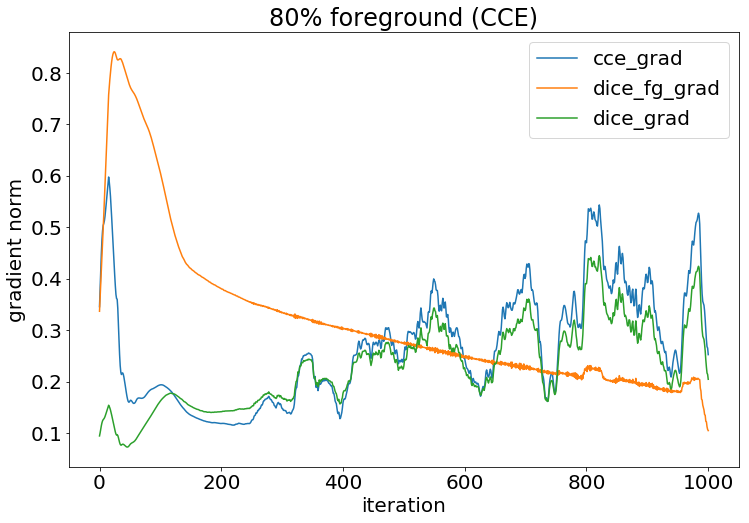

In [46]:
plot_grad(load(cce80_filename), title='80% foreground (CCE)', smooth=30)

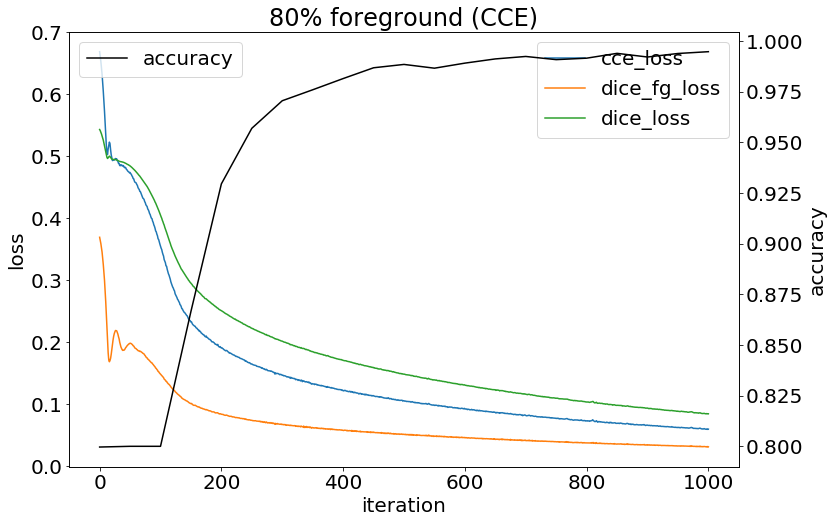

In [47]:
plot(load(cce80_filename), title='80% foreground (CCE)')

### DICE FG 50% FG

In [73]:
dice_fg50_filename = './dice_fg_50fg.pkl'

In [152]:
result = experiment(0.5, 201, TrainLoss.DICE_FG, summary_dir='./test_dicefg_bn')
save(result, dice_fg50_filename)

INFO:tensorflow:Summary name model/left0/conv0/conv2d/kernel:0 is illegal; using model/left0/conv0/conv2d/kernel_0 instead.
INFO:tensorflow:Summary name model/left0/conv0/conv2d/bias:0 is illegal; using model/left0/conv0/conv2d/bias_0 instead.
INFO:tensorflow:Summary name model/left0/conv1/conv2d/kernel:0 is illegal; using model/left0/conv1/conv2d/kernel_0 instead.
INFO:tensorflow:Summary name model/left0/conv1/conv2d/bias:0 is illegal; using model/left0/conv1/conv2d/bias_0 instead.
INFO:tensorflow:Summary name model/left1/conv0/conv2d/kernel:0 is illegal; using model/left1/conv0/conv2d/kernel_0 instead.
INFO:tensorflow:Summary name model/left1/conv0/conv2d/bias:0 is illegal; using model/left1/conv0/conv2d/bias_0 instead.
INFO:tensorflow:Summary name model/left1/conv1/conv2d/kernel:0 is illegal; using model/left1/conv1/conv2d/kernel_0 instead.
INFO:tensorflow:Summary name model/left1/conv1/conv2d/bias:0 is illegal; using model/left1/conv1/conv2d/bias_0 instead.
INFO:tensorflow:Summary 

100%|██████████| 201/201 [06:05<00:00,  1.82s/it]


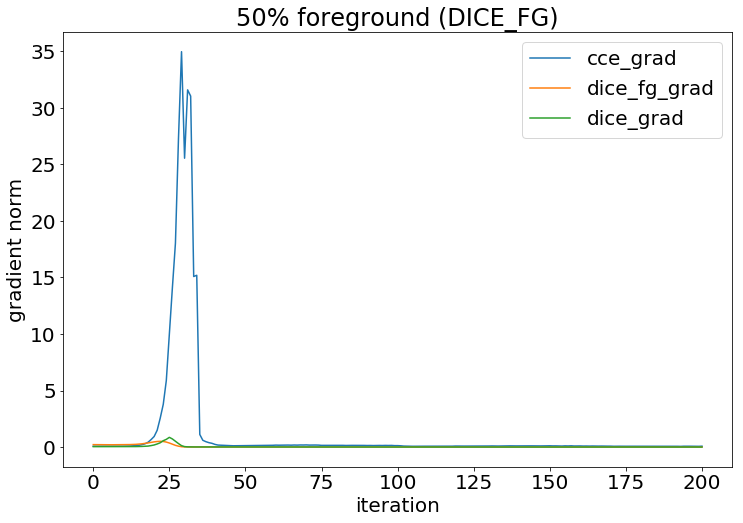

In [153]:
plot_grad(load(dice_fg50_filename), title='50% foreground (DICE_FG)', smooth=0)

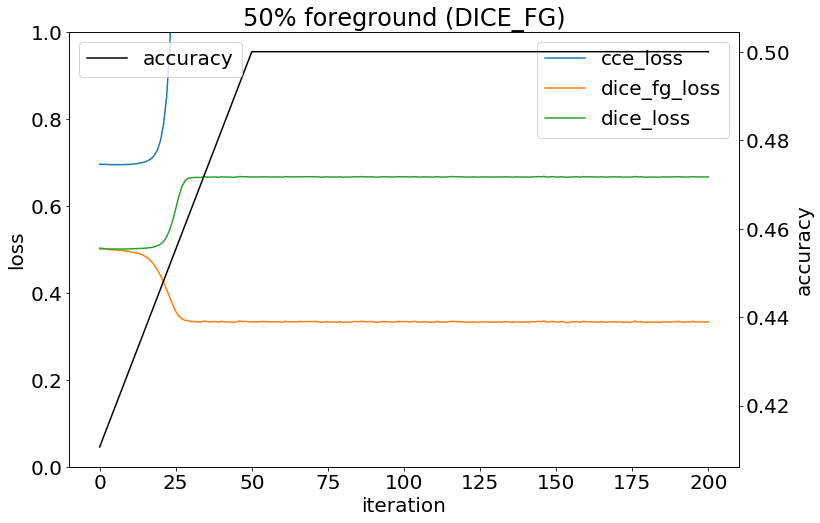

In [154]:
plot(load(dice_fg50_filename), title='50% foreground (DICE_FG)', y1lim=[0,1])

### DICE FG 20% FG

In [52]:
dice_fg20_filename = './dice_fg_20fg.pkl'

In [53]:
result = experiment(0.8, iterations, TrainLoss.DICE_FG)
save(result, dice_fg20_filename)

100%|██████████| 1001/1001 [21:40<00:00,  1.30s/it]


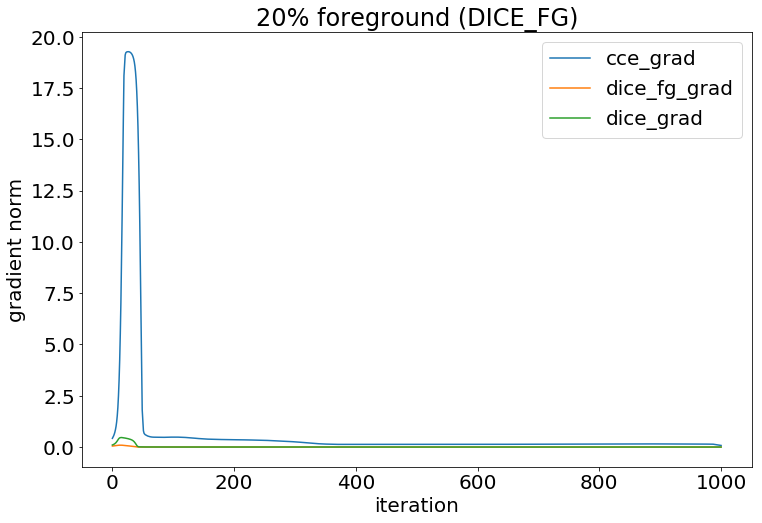

In [54]:
plot_grad(load(dice_fg20_filename), title='20% foreground (DICE_FG)', smooth=30)

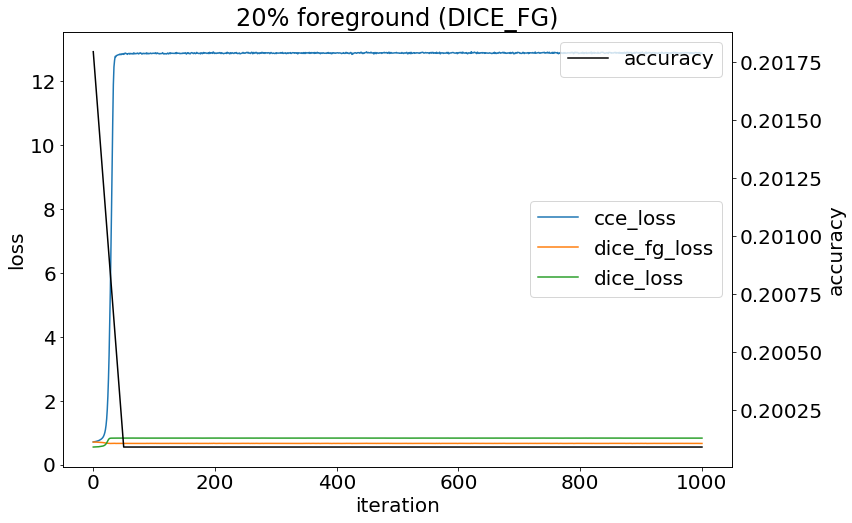

In [55]:
plot(load(dice_fg20_filename), title='20% foreground (DICE_FG)')

### DICE FG 80% FG

In [56]:
dice_fg80_filename = './dice_fg_80fg.pkl'

In [57]:
result = experiment(0.2, iterations, TrainLoss.DICE_FG)
save(result, dice_fg80_filename)

100%|██████████| 1001/1001 [21:17<00:00,  1.28s/it]


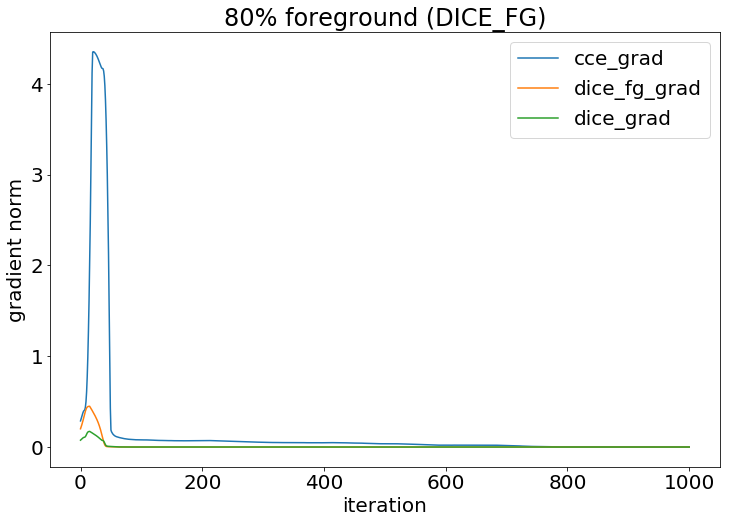

In [58]:
plot_grad(load(dice_fg80_filename), title='80% foreground (DICE_FG)', smooth=30)

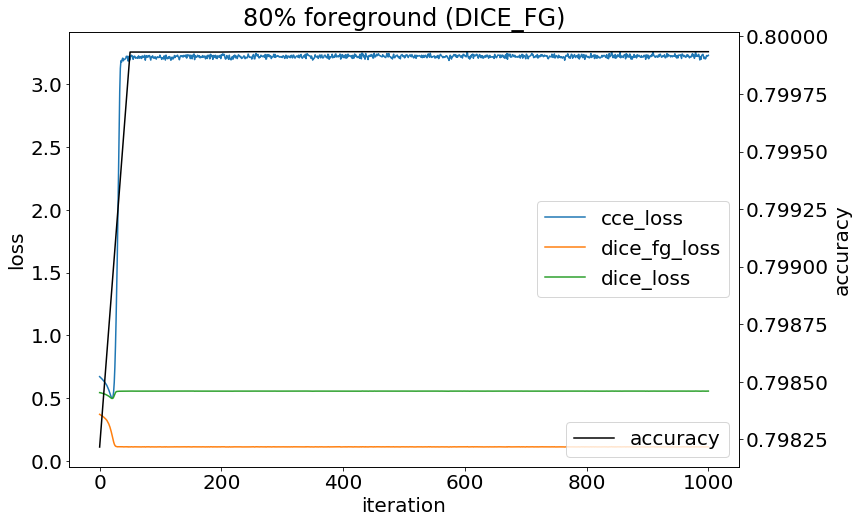

In [59]:
plot(load(dice_fg80_filename), title='80% foreground (DICE_FG)')

### DICE 50% FG

In [60]:
dice50_filename = './dice_50fg.pkl'

In [136]:
result = experiment(0.5, 201, TrainLoss.DICE, summary_dir='./test_dice')
save(result, dice50_filename)

INFO:tensorflow:Summary name model/left0/conv0/conv2d/kernel:0 is illegal; using model/left0/conv0/conv2d/kernel_0 instead.
INFO:tensorflow:Summary name model/left0/conv0/conv2d/bias:0 is illegal; using model/left0/conv0/conv2d/bias_0 instead.
INFO:tensorflow:Summary name model/left0/conv1/conv2d/kernel:0 is illegal; using model/left0/conv1/conv2d/kernel_0 instead.
INFO:tensorflow:Summary name model/left0/conv1/conv2d/bias:0 is illegal; using model/left0/conv1/conv2d/bias_0 instead.
INFO:tensorflow:Summary name model/left1/conv0/conv2d/kernel:0 is illegal; using model/left1/conv0/conv2d/kernel_0 instead.
INFO:tensorflow:Summary name model/left1/conv0/conv2d/bias:0 is illegal; using model/left1/conv0/conv2d/bias_0 instead.
INFO:tensorflow:Summary name model/left1/conv1/conv2d/kernel:0 is illegal; using model/left1/conv1/conv2d/kernel_0 instead.
INFO:tensorflow:Summary name model/left1/conv1/conv2d/bias:0 is illegal; using model/left1/conv1/conv2d/bias_0 instead.
INFO:tensorflow:Summary 

100%|██████████| 201/201 [05:06<00:00,  1.53s/it]


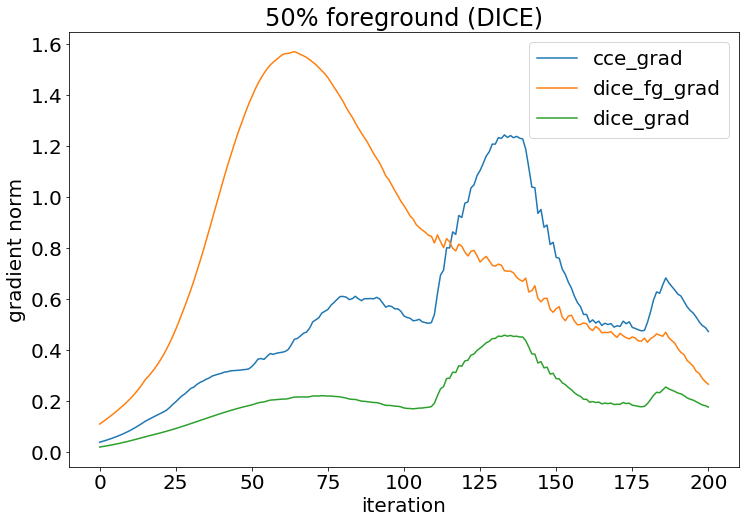

In [137]:
plot_grad(load(dice50_filename), title='50% foreground (DICE)', smooth=30)

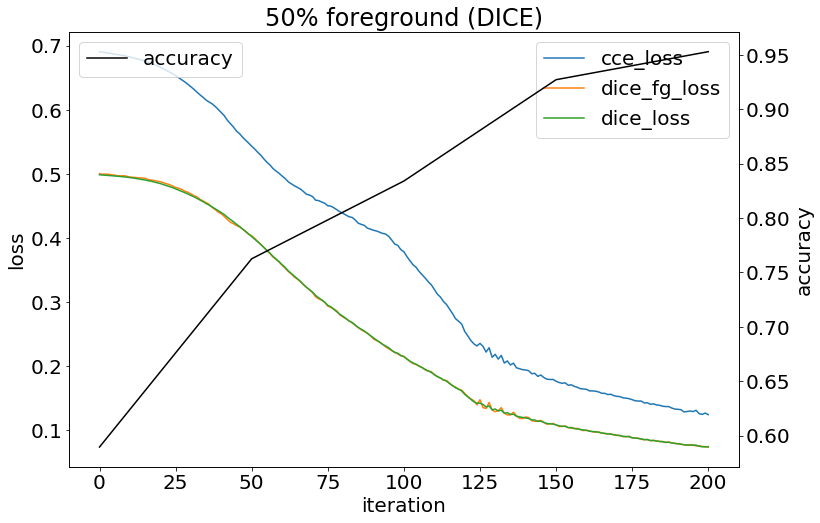

In [138]:
plot(load(dice50_filename), title='50% foreground (DICE)')

### DICE 20% FG

In [65]:
dice20_filename = './dice_20fg.pkl'

In [66]:
result = experiment(0.8, iterations, TrainLoss.DICE)
save(result, dice20_filename)

100%|██████████| 1001/1001 [21:32<00:00,  1.29s/it]


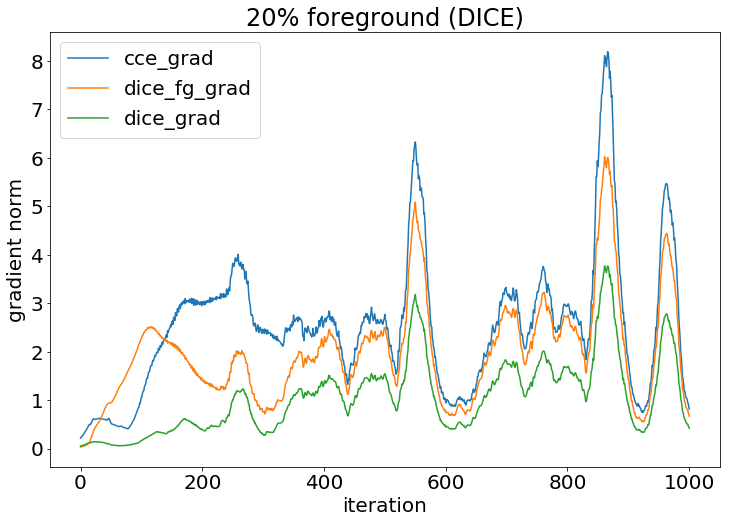

In [67]:
plot_grad(load(dice20_filename), title='20% foreground (DICE)', smooth=30)

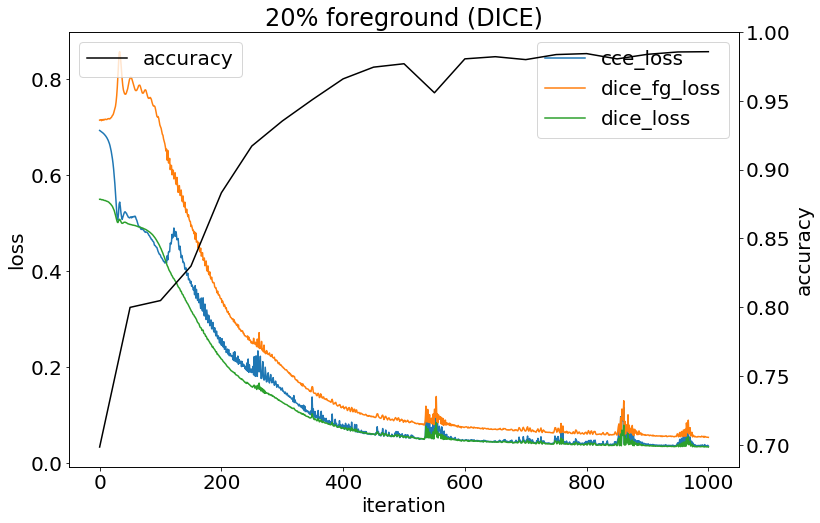

In [68]:
plot(load(dice20_filename), title='20% foreground (DICE)')

### DICE 80% FG

In [69]:
dice80_filename = './dice_80fg.pkl'

In [70]:
result = experiment(0.2, iterations, TrainLoss.DICE)
save(result, dice80_filename)

100%|██████████| 1001/1001 [21:49<00:00,  1.31s/it]


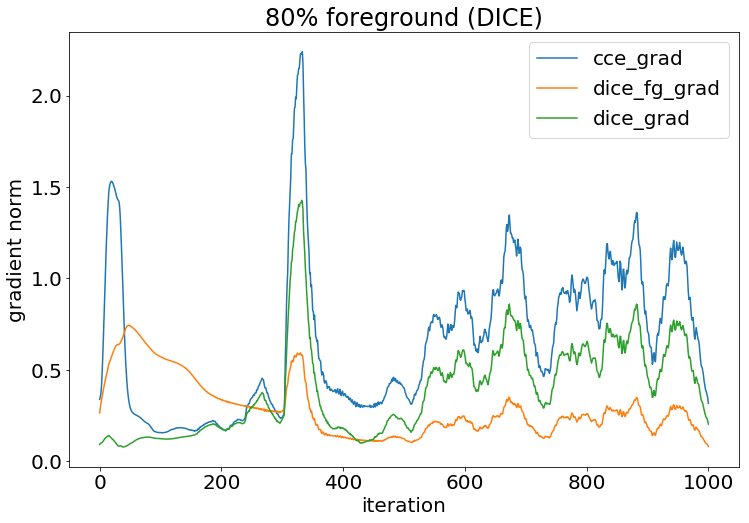

In [71]:
plot_grad(load(dice80_filename), title='80% foreground (DICE)', smooth=30)

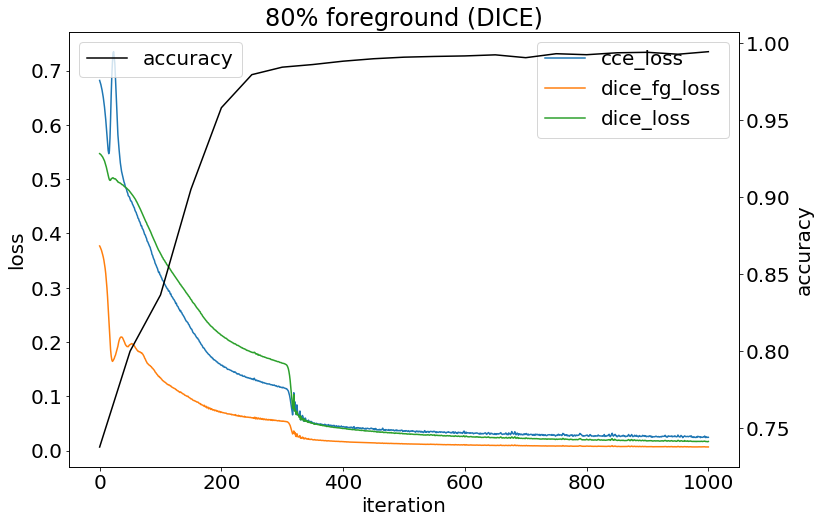

In [72]:
plot(load(dice80_filename), title='80% foreground (DICE)')